<Figure size 432x288 with 0 Axes>

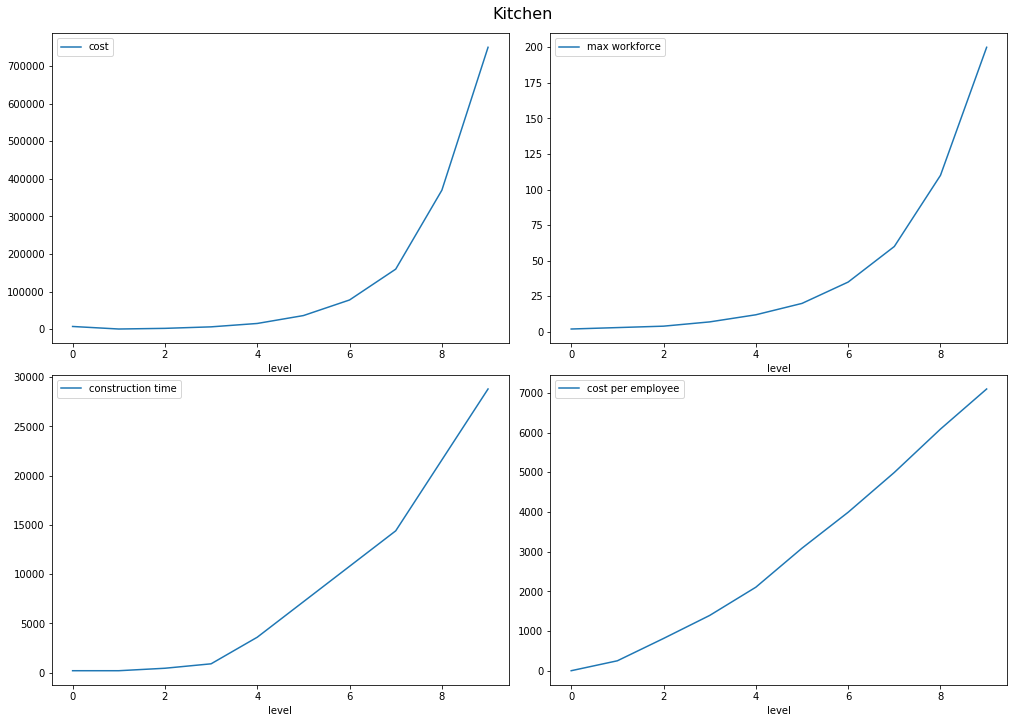

     cost  constructionTime  firstCost  firstConstructionTime  \
0    7500               200        0.0                    8.0   
1     750               200        NaN                    NaN   
2    2500               450        NaN                    NaN   
3    6500               900        NaN                    NaN   
4   15500              3600        NaN                    NaN   
5   36500              7200        NaN                    NaN   
6   78000             10800        NaN                    NaN   
7  160000             14400        NaN                    NaN   
8  370000             21600        NaN                    NaN   
9  750000             28800        NaN                    NaN   

   employer.maxWorkforce  costTotal  employer.costPerEmployee  
0                      2       7500                  0.000000  
1                      3       8250                250.000000  
2                      4      10750                812.500000  
3                      7    

<Figure size 432x288 with 0 Axes>

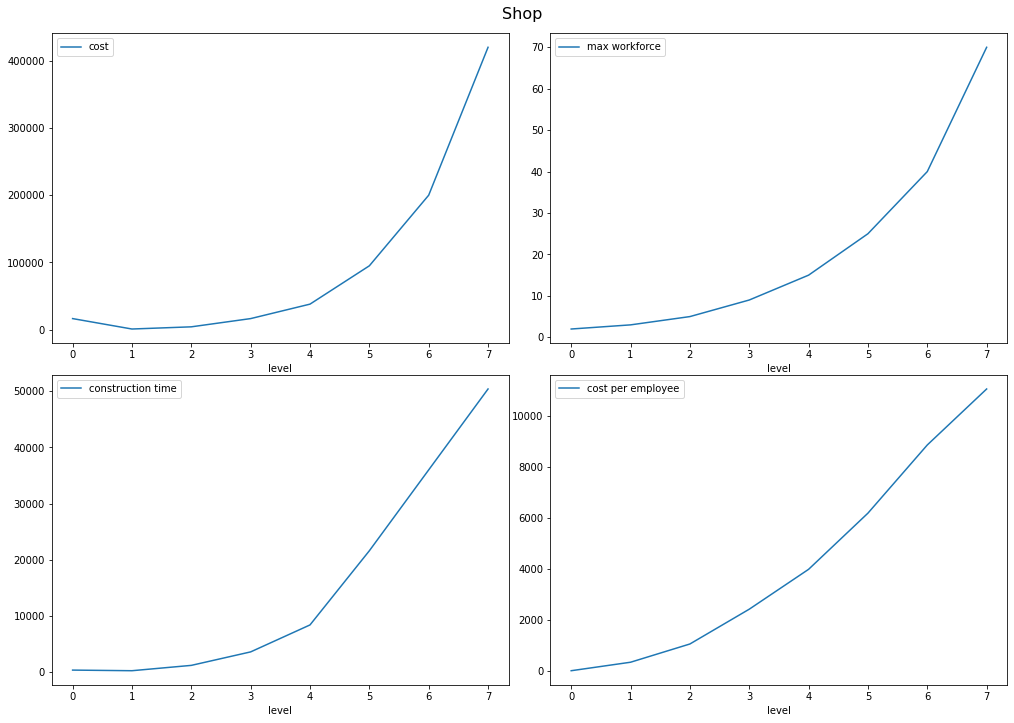

     cost  constructionTime  firstCost  firstConstructionTime  \
0   16500               360        0.0                   12.0   
1    1000               250        NaN                    NaN   
2    4250              1200        NaN                    NaN   
3   16500              3600        NaN                    NaN   
4   38000              8400        NaN                    NaN   
5   95000             21600        NaN                    NaN   
6  200000             36000        NaN                    NaN   
7  420000             50400        NaN                    NaN   

   employer.maxWorkforce  costTotal  employer.costPerEmployee  
0                      2      16500                  0.000000  
1                      3      17500                333.333333  
2                      5      21750               1050.000000  
3                      9      38250               2416.666667  
4                     15      76250               3983.333333  
5                     25     1

<Figure size 432x288 with 0 Axes>

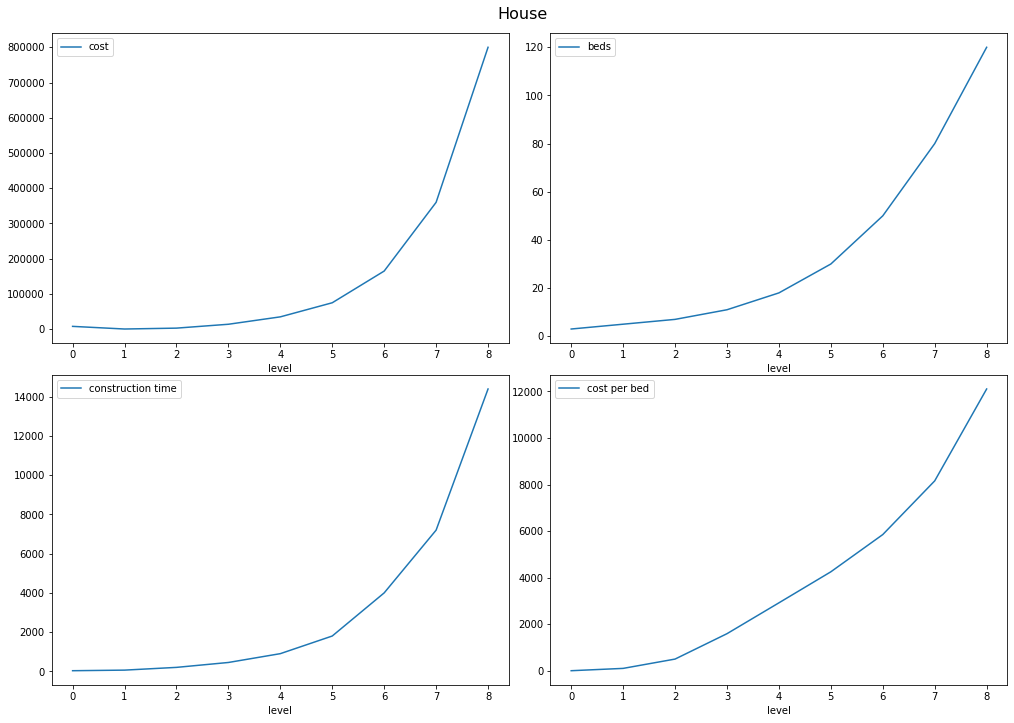

     cost  constructionTime  firstCost  firstConstructionTime  residence.beds  \
0    8000                30      100.0                   10.0               3   
1     500                60        NaN                    NaN               5   
2    3000               200        NaN                    NaN               7   
3   14000               450        NaN                    NaN              11   
4   35000               900        NaN                    NaN              18   
5   75000              1800        NaN                    NaN              30   
6  165000              4000        NaN                    NaN              50   
7  360000              7200        NaN                    NaN              80   
8  800000             14400        NaN                    NaN             120   

   costTotal  residence.costPerBed  
0       8000              0.000000  
1       8500            100.000000  
2      11500            500.000000  
3      25500           1590.909091  
4   

<Figure size 432x288 with 0 Axes>

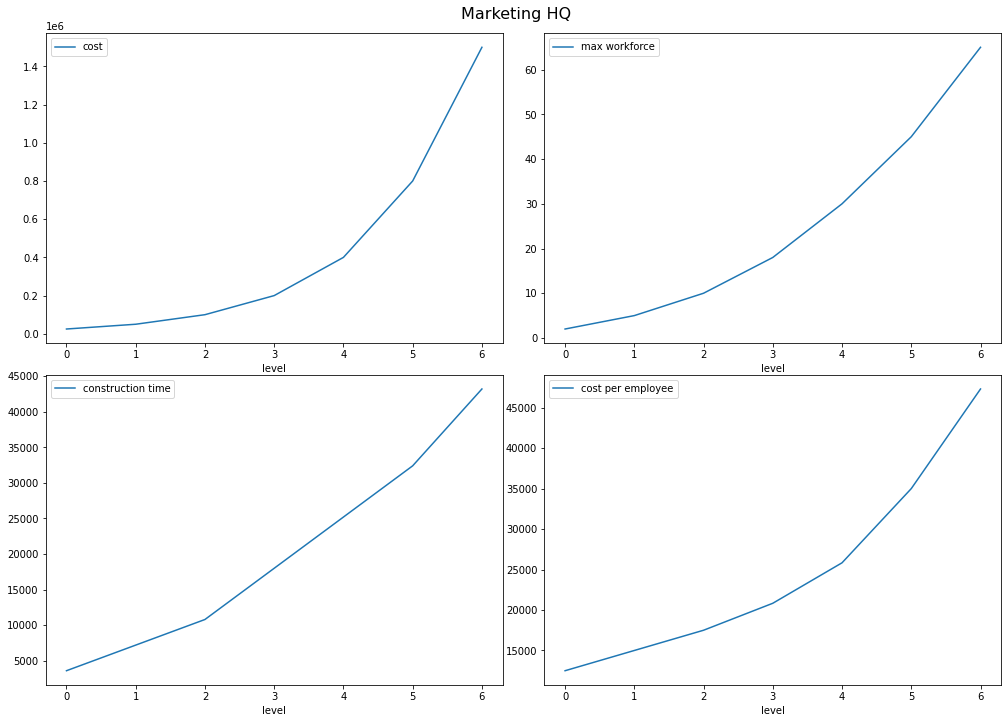

      cost  constructionTime  employer.maxWorkforce  costTotal  \
0    25000              3600                      2      25000   
1    50000              7200                      5      75000   
2   100000             10800                     10     175000   
3   200000             18000                     18     375000   
4   400000             25200                     30     775000   
5   800000             32400                     45    1575000   
6  1500000             43200                     65    3075000   

   employer.costPerEmployee  
0              12500.000000  
1              15000.000000  
2              17500.000000  
3              20833.333333  
4              25833.333333  
5              35000.000000  
6              47307.692308  


    cost  constructionTime  costTotal
0  50000              7200      50000




<Figure size 432x288 with 0 Axes>

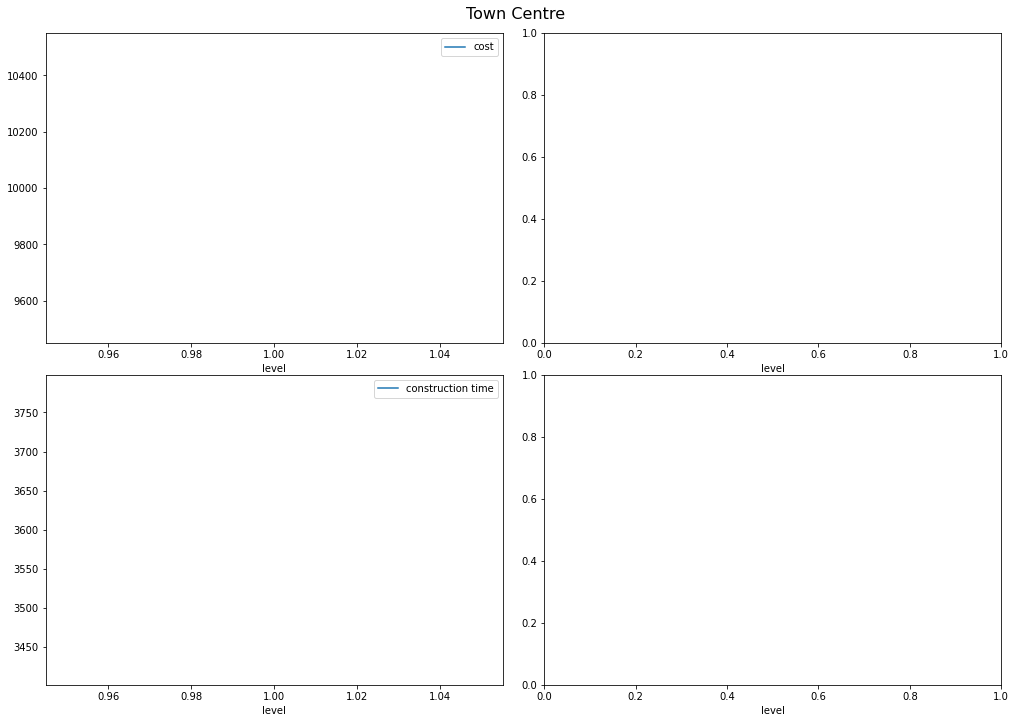

      cost  constructionTime                                      description  \
0      NaN               NaN                                              NaN   
1  10000.0            3600.0  Upgrade allows sell price for pizza to changed.   

   costTotal  
0        NaN  
1    10000.0  


In [42]:
from matplotlib import pyplot as plt
import pandas as pd
import requests, json
%matplotlib inline

url = requests.get("http://localhost:3000/api/game/gamedata")
data = json.loads(url.text)

skipFirst = ['Kitchen', 'Shop', 'House']

for k in data['buildings']:
    b = data['buildings'][k]

    df = pd.json_normalize(b['levelInfos'], max_level=1)
    df['costTotal'] = df['cost'].cumsum()
    
    print('\n')
    
    if len(b['levelInfos']) < 2:
        print(df)
        continue
        
    building = b['title']
    
    plt.figure()
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    fig.suptitle(building, fontsize=16)
    fig.tight_layout()
    
    axes[0, 0].set_xlabel('level')
    axes[1, 0].set_xlabel('level')
    axes[0, 1].set_xlabel('level')
    axes[1, 1].set_xlabel('level')
    
    df['cost'].plot(ax=axes[0, 0], legend=True)
    
    df['constructionTime'].plot(ax=axes[1, 0], legend=True, label='construction time')
    
    
    if 'employer.maxWorkforce' in df:
        if building in skipFirst:
            df['employer.costPerEmployee'] =  df['cost'].iloc[1:].cumsum() / df['employer.maxWorkforce']
            df.loc[df.index[0], 'employer.costPerEmployee'] = 0
        else:
            df['employer.costPerEmployee'] =  df['cost'].cumsum() / df['employer.maxWorkforce']
        
        df['employer.maxWorkforce'].plot(ax=axes[0, 1], legend=True, label='max workforce')
        df['employer.costPerEmployee'].plot(ax=axes[1, 1], legend=True, label='cost per employee')
        
    if 'residence.beds' in df:
        if building in skipFirst:
            df['residence.costPerBed'] = df['cost'].iloc[1:].cumsum() / df['residence.beds']
            df.loc[df.index[0], 'residence.costPerBed'] = 0
        else:
            df['residence.costPerBed'] = df['cost'].cumsum() / df['residence.beds']
            
        df['residence.beds'].plot(ax=axes[0 , 1], legend=True, label='beds')
        df['residence.costPerBed'].plot(ax=axes[1, 1], legend=True, label='cost per bed')
        
    plt.show()
    print(df)

